**Phase 1 Project**

**Author:** Jonathan Holt
***

# Overview

## The Problem

Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. I have been charged with exploring what types of films are currently doing the best at the box office, as well as translating those findings into actionable insights.


## The Data

I have been provided with data from several movie tracking websites. The data includes:
- general movie information (title, staff, release date)
- financial data (production budget, gross revenue)
- user and critic ratings

The data is very broad and each data set contains certain data points but none contain all of the data points. My task will be to clean and organize this data into a usable format for gaining insights into the movie industry so that I can make recommendations to Micorosoft.

For this project, I will using the following data:
- Financial Data from The Numbers
- Genre information from IMDB
- Ratings from IMDB


## Questions that I want to answer:

1. How do we determine what a successful movie is?
2. Which genres have been the most successful recently?
3. Which of these genres should Microsoft pursue?
4. How much should Microsoft budget for the movies they produce?

# Data Preparation


## Importing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn') #style that I am using for my visualizations
import seaborn as sns

%matplotlib inline

In [2]:
import glob, os
fpath = 'zippedData/'
os.listdir(fpath)

['imdb.title.crew.csv.gz',
 'tmdb.movies.csv.gz',
 'imdb.title.akas.csv.gz',
 'imdb.title.ratings.csv.gz',
 'imdb.name.basics.csv.gz',
 'rt.reviews.tsv.gz',
 'imdb.title.basics.csv.gz',
 'rt.movie_info.tsv.gz',
 'tn.movie_budgets.csv.gz',
 'bom.movie_gross.csv.gz',
 'imdb.title.principals.csv.gz']

In [3]:
query = fpath+"*.gz"

file_list=glob.glob(query)
file_list

['zippedData/imdb.title.crew.csv.gz',
 'zippedData/tmdb.movies.csv.gz',
 'zippedData/imdb.title.akas.csv.gz',
 'zippedData/imdb.title.ratings.csv.gz',
 'zippedData/imdb.name.basics.csv.gz',
 'zippedData/rt.reviews.tsv.gz',
 'zippedData/imdb.title.basics.csv.gz',
 'zippedData/rt.movie_info.tsv.gz',
 'zippedData/tn.movie_budgets.csv.gz',
 'zippedData/bom.movie_gross.csv.gz',
 'zippedData/imdb.title.principals.csv.gz']

In [4]:
tables = {}

for file in file_list:
    print('---'*20)
    file_name = file.replace('zippedData/', '').replace('.', '_')
    print(file_name)
    
    
    
    if 'tsv.gz' in file:
        temp_df = pd.read_csv(file, sep= "\t", encoding = "latin-1")
    else:
        temp_df = pd.read_csv(file)
    
    display(temp_df.head(), temp_df.tail())
    tables[file_name] = temp_df

------------------------------------------------------------
imdb_title_crew_csv_gz


,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


,tconst,directors,writers
146139,tt8999974,nm10122357,nm10122357
146140,tt9001390,nm6711477,nm6711477
146141,tt9001494,"nm10123242,nm10123248",NaN
146142,tt9004986,nm4993825,nm4993825
146143,tt9010172,NaN,nm8352242


------------------------------------------------------------
tmdb_movies_csv_gz


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.6,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.6,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.6,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.6,2018-06-22,Trailer Made,0.0,1
26516,26516,"[53, 27]",309885,en,The Church,0.6,2018-10-05,The Church,0.0,1


------------------------------------------------------------
imdb_title_akas_csv_gz


,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


,title_id,ordering,title,region,language,types,attributes,is_original_title
331698,tt9827784,2,Sayonara kuchibiru,NaN,NaN,original,NaN,1.0
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,NaN,0.0
331700,tt9880178,1,La atención,NaN,NaN,original,NaN,1.0
331701,tt9880178,2,La atención,ES,NaN,NaN,NaN,0.0
331702,tt9880178,3,The Attention,XWW,en,imdbDisplay,NaN,0.0


------------------------------------------------------------
imdb_title_ratings_csv_gz


,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


,tconst,averagerating,numvotes
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5
73855,tt9894098,6.3,128


------------------------------------------------------------
imdb_name_basics_csv_gz


,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
606643,nm9990381,Susan Grobes,NaN,NaN,actress,NaN
606644,nm9990690,Joo Yeon So,NaN,NaN,actress,"tt9090932,tt8737130"
606645,nm9991320,Madeline Smith,NaN,NaN,actress,"tt8734436,tt9615610"
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer,NaN
606647,nm9993380,Pegasus Envoyé,NaN,NaN,"director,actor,writer",tt8743182


------------------------------------------------------------
rt_reviews_tsv_gz


,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


,id,review,rating,fresh,critic,top_critic,publisher,date
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"
54431,2000,NaN,3/5,fresh,Nicolas Lacroix,0,Showbizz.net,"November 12, 2002"


------------------------------------------------------------
imdb_title_basics_csv_gz


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN
146143,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,Documentary


------------------------------------------------------------
rt_movie_info_tsv_gz


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN
1559,2000,"Suspended from the force, Paris cop Hubert is ...",R,Action and Adventure|Art House and Internation...,NaN,Luc Besson,"Sep 27, 2001","Feb 11, 2003",NaN,NaN,94 minutes,Columbia Pictures


------------------------------------------------------------
tn_movie_budgets_csv_gz


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0
5781,82,"Aug 5, 2005",My Date With Drew,"$1,100","$181,041","$181,041"


------------------------------------------------------------
bom_movie_gross_csv_gz


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


,title,studio,domestic_gross,foreign_gross,year
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018
3386,An Actor Prepares,Grav.,1700.0,NaN,2018


------------------------------------------------------------
imdb_title_principals_csv_gz


,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


,tconst,ordering,nconst,category,job,characters
1028181,tt9692684,1,nm0186469,actor,NaN,"[""Ebenezer Scrooge""]"
1028182,tt9692684,2,nm4929530,self,NaN,"[""Herself"",""Regan""]"
1028183,tt9692684,3,nm10441594,director,NaN,NaN
1028184,tt9692684,4,nm6009913,writer,writer,NaN
1028185,tt9692684,5,nm10441595,producer,producer,NaN


## Formating Cell
I am keeping all of my display commands here so I can easily find them if/when I need
to change anything.

In [5]:
pd.set_option('display.max_rows', 1000)
#change the amount of rows displayed
pd.options.display.float_format = '{:,.0f}'.format 
#This takes the decimal places out of floats. I may need to change this for some of the other features.

## Table Aliases
Setting an alias for each table so that it is easier to use them.

In [6]:
table1 = tables['imdb_title_crew_csv_gz']
table2 = tables['tmdb_movies_csv_gz']
table3 = tables['imdb_title_akas_csv_gz']
table4 = tables['imdb_title_ratings_csv_gz']
table5 = tables['imdb_name_basics_csv_gz']
table6 = tables['rt_reviews_tsv_gz']
table7 = tables['imdb_title_basics_csv_gz']
table8 = tables['rt_movie_info_tsv_gz']
table9 = tables['tn_movie_budgets_csv_gz']
table10 = tables['bom_movie_gross_csv_gz']
table11 = tables['imdb_title_principals_csv_gz']

# Initial Data Cleaning

I will start my data exploration/cleaning with the financial information from The Numbers (table9)

In [7]:
#sorting by worldwide gross
table9.sort_values(by='worldwide_gross', ascending=False).head(2)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
3737,38,"Aug 21, 2009",Fifty Dead Men Walking,"$10,000,000",$0,"$997,921"
3432,33,"Sep 30, 2005",Duma,"$12,000,000","$870,067","$994,790"


Something is wrong here. I assume that it is sorting anything with a '9' in the front first. I presume that the dollar amounts are strings instead of integers. I should also check for null values while I'm checking for this.

In [8]:
table9.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

There are no null values, but there are likely placeholders

I will now clean the three financial columns. Removing the $, removing the comma, then converting to float.

In [9]:
cleaned_budget = table9['production_budget'].map(lambda x: x.replace('$',' '))
cleaned_budget = cleaned_budget.map(lambda x: x.replace(',',''))
cleaned_budget = cleaned_budget.astype(float)

cleaned_domestic = table9['domestic_gross'].map(lambda x: x.replace('$',' '))
cleaned_domestic =cleaned_domestic.map(lambda x: x.replace(',',''))
cleaned_domestic = cleaned_domestic.astype(float)

cleaned_worldwide = table9['worldwide_gross'].map(lambda x: x.replace('$',' '))
cleaned_worldwide = cleaned_worldwide.map(lambda x: x.replace(',',''))
cleaned_worldwide = cleaned_worldwide.astype(float)

In [10]:
#Putting my cleaned data into the table.
table9["production_budget"] = cleaned_budget
table9["domestic_gross"] = cleaned_domestic
table9["worldwide_gross"] = cleaned_worldwide
table9 = table9.sort_values(by='worldwide_gross', ascending=False)

#converting release_date to datetime format.
cleaned_release_date = pd.to_datetime(table9['release_date'])
table9['release_date']= cleaned_release_date

#Creating a column 'release_year' to more easily search general release dates, etc.
table9['release_year'] = table9['release_date'].dt.year

table9.head(2)


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year
0,1,2009-12-18,Avatar,"425,000,000","760,507,625","2,776,345,279",2009
42,43,1997-12-19,Titanic,"200,000,000","659,363,944","2,208,208,395",1997


What is the range of release dates in this data set?

In [11]:
table9.sort_values(by='release_date', ascending=False).tail(2)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year
5523,24,1916-09-05,Intolerance,"385,907",0,0,1916
5677,78,1915-02-08,The Birth of a Nation,"110,000","10,000,000","11,000,000",1915


In [12]:
table9.sort_values(by='release_date', ascending=False).head(2)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year
194,95,2020-12-31,Moonfall,"150,000,000",0,0,2020
1205,6,2020-12-31,Hannibal the Conqueror,"50,000,000",0,0,2020


The earliest movie is from 1915. The most recent are from 2020.
- I doubt that I will need data from movies from more than a few decades ago. I will slice out recent movie data as I proceed with my data cleaning.
- The movies from 2020 have no performance data. It will be okay to exclude them from analysis as they aren't relevant.
- The bulk of the data starts in 1996 where there are 100+ movies every year afterward until 2018. There is a little bit of info for 2019.

## Calculating Total Profit and ROI
- The first way that I will be manipulating the cleaned data is to calculate two financial performance metrics: Total Profit, and Return on Investment (ROI)

In [13]:
#creating a column that calculates the profit for each movie. (gross - budget)
total_profit = table9.apply(lambda x: x['worldwide_gross'] - x['production_budget'], axis=1)
table9['total_profit'] = total_profit

#creating a column that calculates ROI for each movie. (Profit divided by budget)
roi = table9.apply(lambda x: x['total_profit'] / x['production_budget'], axis=1)
table9['ROI'] = roi

table9.head(2)


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,total_profit,ROI
0,1,2009-12-18,Avatar,"425,000,000","760,507,625","2,776,345,279",2009,"2,351,345,279",6
42,43,1997-12-19,Titanic,"200,000,000","659,363,944","2,208,208,395",1997,"2,008,208,395",10


## Getting Genre Data
I am happy with where my financial data is at the moment. Now I want to find a way to indentify the **genres** of these movies as that will help me answer the specific question of what ***types*** **of movies should be made.**. 
I will use IMDB Basics (Table 7) to get this data. I need to clean the data and find a way to properly combine it with the financial data that I already have.

In [14]:
table7.sort_values(by='start_year', ascending=True).head(2)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
9599,tt1566491,Brainiacs in La La Land,Brainiacs in La La Land,2010,nan,Comedy
43264,tt2578092,Fireplace for your Home: Crackling Fireplace w...,Fireplace for your Home: Crackling Fireplace w...,2010,61,Music


### Analysis:
- This data only goes back to 2010. **This will still be useful as Microsoft will want current information on
which genres are popular.**
- I want to see what other data I can collect from the IMDB datasets before attempting to merge the titles from this dataset with my financial data.
- Many of the IMDB datasets contain a field 'tconst' which will link more data to the genres and titles that I have here.

In [15]:
#merging, using the tconst as a key.
imdb_df = pd.merge(table7, table4, left_on= 'tconst', right_on= 'tconst', how='left')
imdb_df= pd.merge(imdb_df, table1, left_on= 'tconst', right_on= 'tconst', how='left')
imdb_df= pd.merge(imdb_df, table11, left_on= 'tconst', right_on= 'tconst', how='left')
imdb_df.head(3)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,directors,writers,ordering,nconst,category,job,characters
0,tt0063540,Sunghursh,Sunghursh,2013,175,"Action,Crime,Drama",7,77,nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276",10,nm0006210,composer,NaN,NaN
1,tt0063540,Sunghursh,Sunghursh,2013,175,"Action,Crime,Drama",7,77,nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276",1,nm0474801,actor,NaN,"[""Kundan S. Prasad"",""Bajrangi""]"
2,tt0063540,Sunghursh,Sunghursh,2013,175,"Action,Crime,Drama",7,77,nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276",2,nm0904537,actress,NaN,"[""Munni"",""Laila-E-Aasmaan""]"


There are a lot of duplicates due to the personnel attached to each movie getting their own record. I doubt that I will need to check the personnel, so let's drop the duplicates.

In [16]:
imdb_df = imdb_df.drop_duplicates('original_title', keep='first')
imdb_df.head(3)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,directors,writers,ordering,nconst,category,job,characters
0,tt0063540,Sunghursh,Sunghursh,2013,175,"Action,Crime,Drama",7,77,nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276",10,nm0006210,composer,NaN,NaN
10,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114,"Biography,Drama",7,43,nm0002411,NaN,1,nm0045119,actress,NaN,NaN
17,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122,Drama,7,"4,517",nm0000080,"nm0000080,nm0462648",10,nm0613657,editor,NaN,NaN


I am dropping a lot of the other fields as well. If I need them again, I can re-merge them using the tconst. I am dropping: *directors, writers, ordering, nconst, category, job, characters*.

In [17]:
imdb_df = imdb_df.drop(['directors', 'writers', 'ordering', 'nconst', 'category', 'job', 'characters'], axis = 1)
imdb_df.head(2)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175,"Action,Crime,Drama",7,77
10,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114,"Biography,Drama",7,43


## Merging the Dataframes

I want to now merge this imdb_df with my financial information from The Numbers (table9). I know that if I just do a merge on primary title, some of the results will be incorrect. (Avatar is the top grossing movie but is listed as a horror movie)


In [18]:
#inner join with the indiciator column so I can track where everything is coming from.
merged_originals = pd.merge(table9, imdb_df, left_on= 'movie', right_on= 'original_title', how='left', indicator=True)
merged_originals.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,total_profit,ROI,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,_merge
0,1,2009-12-18,Avatar,"425,000,000","760,507,625","2,776,345,279",2009,"2,351,345,279",6,NaN,NaN,NaN,nan,nan,NaN,nan,nan,left_only
1,43,1997-12-19,Titanic,"200,000,000","659,363,944","2,208,208,395",1997,"2,008,208,395",10,tt2495766,Titanic,Titanic,"2,012",nan,Adventure,6,20,both
2,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,"306,000,000","936,662,225","2,053,311,220",2015,"1,747,311,220",6,NaN,NaN,NaN,nan,nan,NaN,nan,nan,left_only
3,7,2018-04-27,Avengers: Infinity War,"300,000,000","678,815,482","2,048,134,200",2018,"1,748,134,200",6,tt4154756,Avengers: Infinity War,Avengers: Infinity War,"2,018",149,"Action,Adventure,Sci-Fi",8,"670,926",both
4,34,2015-06-12,Jurassic World,"215,000,000","652,270,625","1,648,854,864",2015,"1,433,854,864",7,tt0369610,Jurassic World,Jurassic World,"2,015",124,"Action,Adventure,Sci-Fi",7,"539,338",both


In [19]:
merged_originals.describe()

,id,production_budget,domestic_gross,worldwide_gross,release_year,total_profit,ROI,start_year,runtime_minutes,averagerating,numvotes
count,"5,782","5,782","5,782","5,782","5,782","5,782","5,782","2,330","2,152","2,021","2,021"
mean,50,"31,587,757","41,873,327","91,487,461","2,004","59,899,704",4,"2,014",102,6,"87,954"
std,29,"41,812,077","68,240,597","174,719,969",13,"146,088,881",30,3,23,1,"150,063"
min,1,"1,100",0,0,"1,915","-200,237,650",-1,"2,010",1,2,5
25%,25,"5,000,000","1,429,534","4,125,415","2,000","-2,189,071",-1,"2,011",90,6,"1,680"
50%,50,"17,000,000","17,225,945","27,984,448","2,007","8,550,286",1,"2,014",101,6,"32,327"
75%,75,"40,000,000","52,348,662","97,645,836","2,012","60,968,502",3,"2,016",114,7,"105,279"
max,100,"425,000,000","936,662,225","2,776,345,279","2,020","2,351,345,279","1,799","2,021",189,9,"1,841,066"


- 5782 records after the join.
- I am going to slice these records into two datasets. One that merged on original title, and everything else that still needs to merge.

In [20]:
correct_merge_df = merged_originals.loc[(merged_originals["_merge"] == "both")]
need_to_merge = merged_originals.loc[(merged_originals["_merge"] != "both")]

In [22]:
need_to_merge.head(2)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,total_profit,ROI,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,_merge
0,1,2009-12-18,Avatar,"425,000,000","760,507,625","2,776,345,279",2009,"2,351,345,279",6,NaN,NaN,NaN,nan,nan,NaN,nan,nan,left_only
2,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,"306,000,000","936,662,225","2,053,311,220",2015,"1,747,311,220",6,NaN,NaN,NaN,nan,nan,NaN,nan,nan,left_only


### Dealing with Avatar

In [23]:
correct_merge_df = correct_merge_df.drop(['_merge'], axis=1) #dropping '_merge' so I can continue

Locating Avatar and moving it to the correct_merge_df as I can tell from the release_year, and original_title that the horror movie Avatar is not the one that was the best grossing movie of all time.

In [24]:
avatar = merged_originals.loc[(merged_originals['movie'] == 'Avatar')]
correct_merge_df = correct_merge_df.append(avatar, ignore_index = True)

In [25]:
correct_merge_df.sort_values('total_profit', ascending=False).head(3) 

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,total_profit,ROI,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,_merge
2330,1,2009-12-18,Avatar,"425,000,000","760,507,625","2,776,345,279",2009,"2,351,345,279",6,NaN,NaN,NaN,nan,nan,NaN,nan,nan,left_only
0,43,1997-12-19,Titanic,"200,000,000","659,363,944","2,208,208,395",1997,"2,008,208,395",10,tt2495766,Titanic,Titanic,"2,012",nan,Adventure,6,20,NaN
1,7,2018-04-27,Avengers: Infinity War,"300,000,000","678,815,482","2,048,134,200",2018,"1,748,134,200",6,tt4154756,Avengers: Infinity War,Avengers: Infinity War,"2,018",149,"Action,Adventure,Sci-Fi",8,"670,926",NaN


In [26]:
#need to drop the indicator column if I want to use it again.
need_to_merge = need_to_merge.drop(['_merge'], axis=1)

In [30]:
#dropping Avatar as I know that it is not merging correctly.
need_to_merge = need_to_merge.drop(0)
need_to_merge.head(1)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,total_profit,ROI,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
2,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,"306,000,000","936,662,225","2,053,311,220",2015,"1,747,311,220",6,NaN,NaN,NaN,nan,nan,NaN,nan,nan


### Merging into Project Dataframe
- This is the dataframe that I plan on using as the basis for my analysis.

In [31]:
#merging need_to_merge  with primary name.
merged_with_primary = pd.merge(need_to_merge, imdb_df, left_on= 'movie', right_on= 'primary_title',
                               how='left', indicator=True)

merged_with_primary.head(2)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,total_profit,ROI,tconst_x,...,numvotes_x,tconst_y,primary_title_y,original_title_y,start_year_y,runtime_minutes_y,genres_y,averagerating_y,numvotes_y,_merge
0,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,"306,000,000","936,662,225","2,053,311,220",2015,"1,747,311,220",6,NaN,...,nan,NaN,NaN,NaN,nan,nan,NaN,nan,nan,left_only
1,67,2015-04-03,Furious 7,"190,000,000","353,007,020","1,518,722,794",2015,"1,328,722,794",7,NaN,...,nan,tt2820852,Furious 7,Furious Seven,"2,015",137,"Action,Crime,Thriller",7,"335,074",both


In [32]:
merged_with_primary = merged_with_primary.drop(merged_with_primary.columns[9:16], axis = 1)
merged_with_primary.head(2)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,total_profit,ROI,numvotes_x,tconst_y,primary_title_y,original_title_y,start_year_y,runtime_minutes_y,genres_y,averagerating_y,numvotes_y,_merge
0,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,"306,000,000","936,662,225","2,053,311,220",2015,"1,747,311,220",6,nan,NaN,NaN,NaN,nan,nan,NaN,nan,nan,left_only
1,67,2015-04-03,Furious 7,"190,000,000","353,007,020","1,518,722,794",2015,"1,328,722,794",7,nan,tt2820852,Furious 7,Furious Seven,"2,015",137,"Action,Crime,Thriller",7,"335,074",both


In [33]:
merged_with_primary = merged_with_primary.drop(merged_with_primary.columns[9], axis = 1)
merged_with_primary.head(2)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,total_profit,ROI,tconst_y,primary_title_y,original_title_y,start_year_y,runtime_minutes_y,genres_y,averagerating_y,numvotes_y,_merge
0,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,"306,000,000","936,662,225","2,053,311,220",2015,"1,747,311,220",6,NaN,NaN,NaN,nan,nan,NaN,nan,nan,left_only
1,67,2015-04-03,Furious 7,"190,000,000","353,007,020","1,518,722,794",2015,"1,328,722,794",7,tt2820852,Furious 7,Furious Seven,"2,015",137,"Action,Crime,Thriller",7,"335,074",both


In [34]:
#dropping indicator column
merged_with_primary = merged_with_primary.drop(merged_with_primary.columns[16], axis = 1)
merged_with_primary.head(2)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,total_profit,ROI,tconst_y,primary_title_y,original_title_y,start_year_y,runtime_minutes_y,genres_y,averagerating_y,_merge
0,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,"306,000,000","936,662,225","2,053,311,220",2015,"1,747,311,220",6,NaN,NaN,NaN,nan,nan,NaN,nan,left_only
1,67,2015-04-03,Furious 7,"190,000,000","353,007,020","1,518,722,794",2015,"1,328,722,794",7,tt2820852,Furious 7,Furious Seven,"2,015",137,"Action,Crime,Thriller",7,both


In [35]:
#Renaming the columns which contain _y
merged_with_primary.rename(columns = {'averagerating_y':'averagerating', 'numvotes_y':'numvotes',
                              'primary_title_y':'primary_title', 'original_title_y':'original_title',
                              'start_year_y': 'start_year', 'runtime_minutes_y': 'runtime_minutes',
                              'genres_y' : 'genres'}, inplace = True)

In [36]:
merged_with_primary.head(1)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,total_profit,ROI,tconst_y,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,_merge
0,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,"306,000,000","936,662,225","2,053,311,220",2015,"1,747,311,220",6,NaN,NaN,NaN,nan,nan,NaN,nan,left_only


Appending "merged with primary" to correct merge to make project_df.

In [37]:
project_df =  correct_merge_df.append(merged_with_primary, ignore_index=True)
project_df.head(2)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,total_profit,ROI,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,_merge,tconst_y
0,43,1997-12-19,Titanic,"200,000,000","659,363,944","2,208,208,395",1997,"2,008,208,395",10,tt2495766,Titanic,Titanic,"2,012",nan,Adventure,6,20,NaN,NaN
1,7,2018-04-27,Avengers: Infinity War,"300,000,000","678,815,482","2,048,134,200",2018,"1,748,134,200",6,tt4154756,Avengers: Infinity War,Avengers: Infinity War,"2,018",149,"Action,Adventure,Sci-Fi",8,"670,926",NaN,NaN


In [38]:
#dropping the columns that I missed before.
project_df = project_df.drop(project_df[['_merge', 'tconst_y']], axis = 1)
project_df.head(2)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,total_profit,ROI,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,43,1997-12-19,Titanic,"200,000,000","659,363,944","2,208,208,395",1997,"2,008,208,395",10,tt2495766,Titanic,Titanic,"2,012",nan,Adventure,6,20
1,7,2018-04-27,Avengers: Infinity War,"300,000,000","678,815,482","2,048,134,200",2018,"1,748,134,200",6,tt4154756,Avengers: Infinity War,Avengers: Infinity War,"2,018",149,"Action,Adventure,Sci-Fi",8,"670,926"


In [39]:
#checking for duplicates
duplicates = project_df[project_df.duplicated()]
print(len(duplicates))
duplicates.head()

0


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,total_profit,ROI,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes


In [40]:
#storing this df as project_df_master to keep all of this data safe before I start slicing out what I need.
project_df_master = project_df

### Cleaning the genre data

The genres that I got from the IMDB dataset are still a set of strings contained in a single field. I need to split them out into three seperate cells so that I can properly analyze them.

In [41]:
project_df[['genre_1', 'genre_2', 'genre_3']] = project_df['genres'].str.split(pat=",", expand=True)

#adding my new genre columns to the master df
project_df_master = project_df

# Initial Data Analysis

Slicing out the columns that I want to use for my analysis.

In [42]:
project_analysis_df = project_df_master[['movie','release_year', 'production_budget', 'total_profit', 'ROI',
                                       'averagerating', 'numvotes','runtime_minutes', 'genre_1', 'genre_2',
                                        'genre_3', ]]
project_analysis_df.head(2)

,movie,release_year,production_budget,total_profit,ROI,averagerating,numvotes,runtime_minutes,genre_1,genre_2,genre_3
0,Titanic,1997,"200,000,000","2,008,208,395",10,6,20,nan,Adventure,None,None
1,Avengers: Infinity War,2018,"300,000,000","1,748,134,200",6,8,"670,926",149,Action,Adventure,Sci-Fi


## Analysis of the Project Dataframe
- using **.describe** methods to get a snapshot of the data contained in my project_analysis dataframe.

In [43]:
project_analysis_df.describe()

,release_year,production_budget,total_profit,ROI,averagerating,numvotes,runtime_minutes
count,"5,787","5,787","5,787","5,787","2,111","2,021","2,245"
mean,"2,004","31,578,160","59,903,032",4,6,"87,954",102
std,13,"41,795,575","146,033,169",30,1,"150,063",22
min,"1,915","1,100","-200,237,650",-1,2,5,1
25%,"2,000","5,000,000","-2,185,710",-1,6,"1,680",90
50%,"2,007","17,000,000","8,585,503",1,6,"32,327",101
75%,"2,012","40,000,000","61,053,888",3,7,"105,279",114
max,"2,020","425,000,000","2,351,345,279","1,799",9,"1,841,066",189


### Analysis 
**Project Analysis dataframe:**

- DF contains **financial data** from The Numbers and **genres** and **ratings** from IMDB.
- 5787 movies in this dataset
- 2111 have ratings and genre information
- Earliest movie is 1915.
- Most recent movie is 2020.

**Next Steps:**
- Recent data will be the most useful as Microsoft wants to know what is **currently** performing well so that they can be in sync with industry trends.  
- Since I only have genre data for the years 2010-2019, so **I will be limited to that for genre analysis.**
- I will also remove movies that are too new to have relevent data. (ex. 2020 movies that have a budget but no revenue)

## Recent Movies (1980-2019)

In [44]:
#creating recent_movies which contains all movies since 1980.
recent_movies = project_analysis_df
recent_movies = recent_movies[recent_movies['release_year'] >= 1980]
recent_movies = recent_movies[recent_movies['release_year'] < 2019]

In [45]:
recent_movies.describe()

,release_year,production_budget,total_profit,ROI,averagerating,numvotes,runtime_minutes
count,"5,446","5,446","5,446","5,446","2,046","1,958","2,169"
mean,"2,006","32,547,996","61,139,859",3,6,"89,710",102
std,8,"42,035,890","148,217,743",16,1,"151,467",22
min,"1,980","1,100","-110,450,242",-1,2,5,1
25%,"2,001","5,400,000","-2,325,559",-1,6,"1,890",90
50%,"2,007","18,000,000","8,541,692",1,6,"34,061",101
75%,"2,012","40,000,000","62,479,245",3,7,"107,131",114
max,"2,018","425,000,000","2,351,345,279",498,9,"1,841,066",189


# Questions to Answer

Now that I have pulled recent movies from my analysis dataframe. I can set out to answer my key questions.

1. How do we determine what a successful movie is?
2. Which genres have been the most successful recently?
3. Which of these genres should Microsoft pursue?
4. How much should Microsoft budget for the movies they produce?

## Question 1: Measuring Success
I am going to use the 2010-2019 dataset as it contains the **genre data** that I need in order to answer future questions. I will slice out the most successful movies.
The two metrics that I will be using are **total profit and return on investment (ROI)**
I will then slice out the top 500 movies as that is roughly the top quartile for this dataset.
**These movies would be good for Microsoft to emulate as we want to be as successful as possible.**

In [46]:
recent_movies_2010 = recent_movies[recent_movies['release_year'] >= 2010]
recent_movies_2000 = recent_movies[recent_movies['release_year'] < 2010]

In [47]:
#function for displaying money in millions.
def millions(x, pos):
    return '${:1.1f}M'.format(x*1e-6)

### Lineplot of Budget and Profit by Year

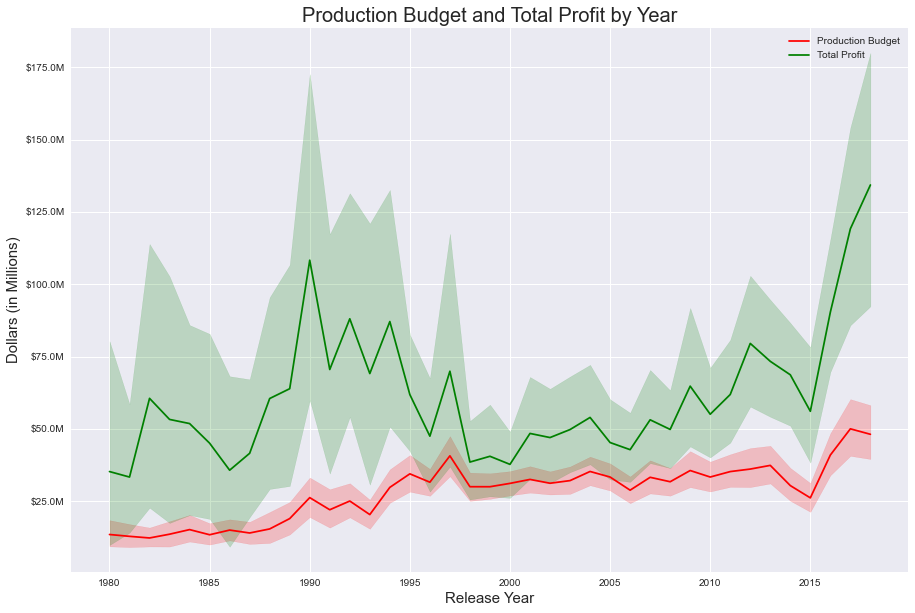

In [49]:
#plotting production budget & total profit over time

fig, ax = plt.subplots(figsize=(15,10))

p = sns.lineplot(x="release_year", y="production_budget", data=recent_movies, label="Production Budget",
                color='red')
p = sns.lineplot(x="release_year", y="total_profit", data=recent_movies, label="Total Profit", color="green")

p.set_xlabel("Release Year", fontsize = 15)
p.set_ylabel("Dollars (in Millions)", fontsize = 15)
p.yaxis.set_major_formatter(millions)
p.set_title("Production Budget and Total Profit by Year", fontsize = 20)
plt.figsize=(15,10) 

plt.show();

**Justifying My Sample Size:**

In the above figure, you can see that while the total profit has a very wide range year-to-year, production budgets have largely stayed the same. In fact, average production budgets remained fairly consistent from the late 1990s through 2015.

While production budgets are currently trending up, the data that I have should be accurate for forecasting future performance.

### What about movies that lose money?

While we are looking at successful movies for Microsoft to emulate, **it is also helpful to look at the movies that didn't do well**. My metric for this is movies that lost money. I will use this to contrast the metrics of success that I look at going forward.

In [50]:
#movies that did not make a profit
loss_df= recent_movies_2010.sort_values('total_profit', ascending=True)
loss_df = loss_df[0:800]

In [51]:
loss_df.describe()

,release_year,production_budget,total_profit,ROI,averagerating,numvotes,runtime_minutes
count,800,800,800,800,614,590,622
mean,"2,014","14,892,543","-7,840,844",-1,6,"22,663",101
std,2,"24,405,873","11,229,875",0,1,"37,982",19
min,"2,010","75,000","-110,450,242",-1,2,6,6
25%,"2,012","1,500,000","-9,891,348",-1,5,745,90
50%,"2,014","6,000,000","-3,818,236",-1,6,"6,746",98
75%,"2,015","18,250,000","-1,172,234",-1,7,"33,432",110
max,"2,018","275,000,000","-66,201",-0,9,"403,755",177


#### Analysis:
- 800 movies from our data set (out of 2200) lost money.
- The **budgets on these movies seem to be smaller** than it is for profitable movies at **8 to 20 million dollars** on the high end (but with at least one going all the way up to 275 million!)
- While I'm sure it's possible to lose more money that you have already spent due to marketing, etc, **based on the data that I have, the most money that a movie can lose is it's production budget**. Perhaps this is why these movies tend to have lower budgets. Maybe the studios know that there is more risk and therefore a greater chance of losing money and therefore don't want to invest as much.

## Question 2: Which Genres have been the most successful?

**What genres correspond to the most profitable movies as well as the movies with the best ROI?**

Note: Since a movie can have multiple genres, I will do value counts for each of the 3 genre columns, and then do value counts to determine how many times each genre is associated with each dataset.

In [52]:
#creating variables
profit_df= recent_movies_2010.sort_values('total_profit', ascending=False) #all recent movies ranked by profit.
roi_df = recent_movies_2010.sort_values('ROI', ascending=False) #all recent movies ranked by ROI.
top_profit = profit_df[0:500] #Top 500 movies by Total Profit
all_profit = profit_df[0:1250] #all movies that made a profit. (top 1250)
top_roi = roi_df[0:500] # top 500 movies by ROI.

In [53]:
#creating function
def genre_df(df): #gets the value counts of the genre columns in a dataframe
    genre_df = df[['genre_1', 'genre_2' , 'genre_3']]
    genre_counts= genre_df.apply(pd.Series.value_counts)
    genre_df = genre_counts.fillna(0)
    genre_df['total'] = genre_counts.sum(axis=1)
    genre_df = genre_df.reset_index()
    return genre_df

Using my genre_df function to get the genres associated with profitable movies (top 500 profit), as well as movies that lost money.

In [54]:
#These are the genres from the project_df which did not make a profit.
loss_genre_df = genre_df(loss_df)
loss_genre_df = loss_genre_df.reset_index()
loss_genre_df = loss_genre_df.drop(loss_genre_df[['level_0','genre_1', 'genre_2', 'genre_3']], axis=1)
loss_genre_df = loss_genre_df.sort_values('total', ascending=False)

#These are the genres from the 500 most profitable movies from 2010-2019
genre_df_profit = genre_df(top_profit)
genre_df_profit = genre_df_profit.sort_values('total', ascending=False)
genre_df_profit = genre_df_profit.drop(genre_df_profit[['genre_1', 'genre_2', 'genre_3']], axis=1)

#Genre DF for ALL movies from dataset 
genre_df_2010 = genre_df(recent_movies_2010)
genre_df_2010 = genre_df_2010.drop(genre_df_2010[['genre_1', 'genre_2', 'genre_3']], axis=1)
genre_df_2010 = genre_df_2010.sort_values('total', ascending = False)

#These are the genres from ALL profitable movies from 2010-2019
genre_df_all_profit = genre_df(all_profit)
genre_df_all_profit = genre_df_all_profit.drop(genre_df_all_profit[['genre_1', 'genre_2', 'genre_3']], axis=1)
genre_df_all_profit = genre_df_all_profit.sort_values('total', ascending=False)

#These are the genres from the 500 movies with the best ROI from 2010-2019
genre_df_roi = genre_df(top_roi)
genre_df_roi = genre_df_roi.sort_values('total', ascending=False)
genre_df_roi = genre_df_roi.drop(genre_df_roi[['genre_1', 'genre_2', 'genre_3']], axis=1)

### Genre Top Profit & ROI

In [67]:
#Genres that are associated with the Top 500 most profitable movies and/or the 500 movies with the best ROI.

genre_df_merged = pd.merge(genre_df_profit, genre_df_roi, on= 'index', how='left')
genre_df_merged = genre_df_merged.rename(columns={'total_x': 'profit_genres', 'total_y': 'roi_genres'})
genre_df_merged

,index,profit_genres,roi_genres
0,Adventure,197,101
1,Action,190,105
2,Comedy,162,153
3,Drama,129,202
4,Thriller,74,81
5,Sci-Fi,70,48
6,Animation,69,36
7,Fantasy,45,28
8,Crime,40,42
9,Romance,40,64


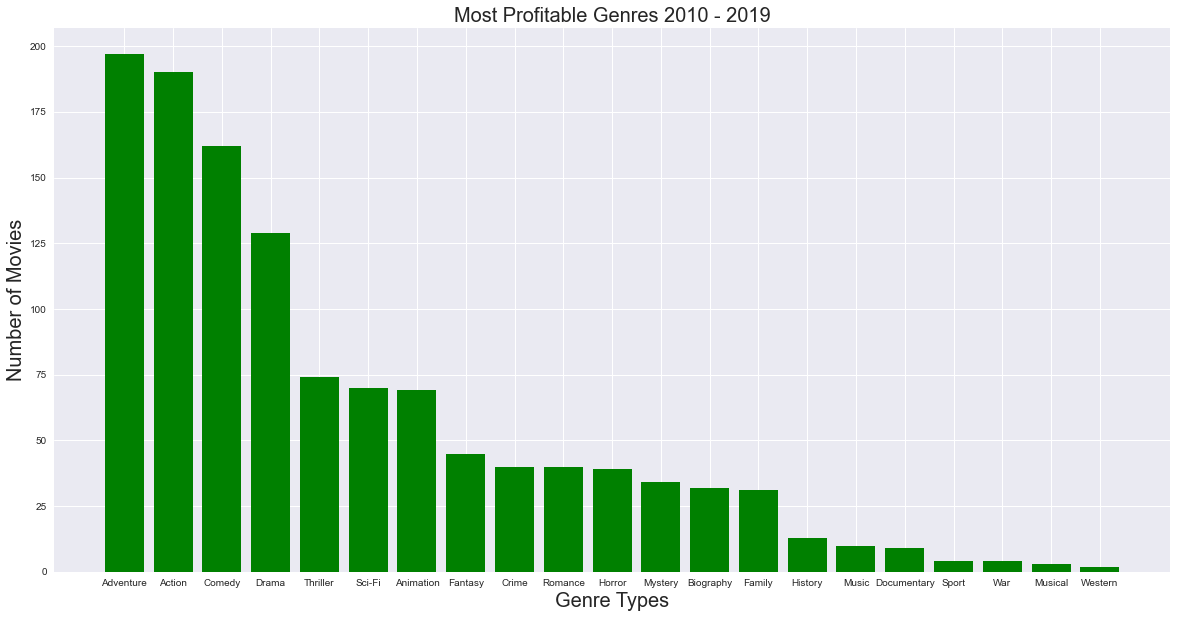

In [68]:
df = genre_df_merged

fig, ax = plt.subplots(figsize = (20,10))

ax.bar(x=df['index'], height=df['profit_genres'],  color="green")

ax.set_xlabel('Genre Types', size=20)
ax.set_ylabel('Number of Movies', size=20)
ax.set_title('Most Profitable Genres 2010 - 2019', size=20);


In [69]:
genre_df_2010.loc[7:11]

,index,total
7,Drama,885
4,Comedy,583
0,Action,479
1,Adventure,369
18,Thriller,312
5,Crime,271
15,Romance,226
11,Horror,224


### What Movies are being Made?

The Genres that are most common (and presumably most popular) are:
1. Drama
2. Comedy
3. Action
4. Adventure
5. Thriller
6. Crime
7. Romance
8. Horror

However, just because these are the most common genres, that doesn't mean that they are the best performing genres.

### Top Performing Genres by Total Profit and ROI
Looking at the top 500 movies (the top quartile of our dataset), we see the top performing genres.

**Top by Profit**
1. Adventure
2. Action
3. Comedy
4. Drama
5. Thriller

**Top by ROI**
1. Drama
2. Comedy
3. Action
4. Adventure
5. Thriller




This information tells us how many of the top profit and ROI movies are classified as each genre.**However, the data does NOT tell us how many of each type of movie is being made, and how many are unsuccessful. We will need to to dig further to uncover that information.**

However, **this data set does accurately show which genres were successful in the time period that we have data for**. So it's safe to assume that these are the most popular genres being made, answering question 2.


## Genre Success Rate

Let's find out how successful each genre is when you also take into consideration how many movies of that genre did not meet our success metrics.

In [70]:
#function for determining success rate

def success_rate_df(df):
    success_rate = df.apply(lambda x: x['Profit'] / x['Total'], axis=1)
    df['success_rate'] = success_rate
    df['success_rate'] = df['success_rate'].map("{:.2%}".format)
    df = df.sort_values('success_rate', ascending=False)


In [71]:
#function for determining loss rate
def loss_rate_df(df):
    loss_rate = df.apply(lambda x: x['Loss'] / x['Total'], axis=1)
    df['loss_rate'] = loss_rate
    df['loss_rate'] = df['loss_rate'].map("{:.2%}".format)
    df = df.sort_values('loss_rate', ascending=False)

**First, let's identify the movies that aren't losing money.**

In [75]:
#Comparing genres of ALL profitable movies from 2010 df with genres of movies that lost money.

genre_comparison_df_2 = pd.merge(genre_df_all_profit, loss_genre_df, on='index', how='inner')
genre_comparison_df_2 = genre_comparison_df_2.rename(columns={"total_x": "Profit", "total_y": "Loss"})
total_genre_count_2 = genre_comparison_df_2.apply(lambda x: x['Profit'] + x['Loss'], axis=1)
genre_comparison_df_2['Total'] = total_genre_count_2
genre_comparison_df_2['Difference'] = genre_comparison_df_2.apply(lambda x: x['Profit'] - x['Loss'], axis=1)


success_rate_df(genre_comparison_df_2)
loss_rate_df(genre_comparison_df_2)
genre_comparison_df_2 = genre_comparison_df_2.rename(columns={'success_rate': 'break_even_rate'})
genre_comparison_df_2 = genre_comparison_df_2.sort_values('break_even_rate',ascending=False)
genre_comparison_df_2.head(2)

,index,Profit,Loss,Total,Difference,break_even_rate,loss_rate
9,Animation,94,16,110,78,85.45%,14.55%
3,Adventure,292,75,367,217,79.56%,20.44%


**Not losing money is good. But let's look at the top performing movies, so Microsoft can emulate the most successful examples**
Again we will use the top quartile of our data set as a metric of success to try to emulate.

In [77]:
#Comparing genres of top 500 profitable movies from 2010 df with genres of movies that lost money.

genre_comparison_df = pd.merge(genre_df_profit, loss_genre_df, on='index', how='inner')
genre_comparison_df = genre_comparison_df.rename(columns={"total_x": "Profit", "total_y": "Loss"})
total_genre_count = genre_comparison_df.apply(lambda x: x['Profit'] + x['Loss'], axis=1)
genre_comparison_df['Total'] = total_genre_count
success_rate = genre_comparison_df.apply(lambda x: x['Profit'] / x['Total'], axis=1)
genre_comparison_df['success_rate'] = success_rate
genre_comparison_df['success_rate'] = genre_comparison_df['success_rate'].map("{:.2%}".format)
genre_comparison_df = genre_comparison_df.sort_values('success_rate', ascending=False)
genre_comparison_df['Difference'] = genre_comparison_df.apply(lambda x: x['Profit'] - x['Loss'], axis=1)
genre_comparison_df = genre_comparison_df.rename(columns={'success_rate': 'top_500_rate'})

genre_comparison_df

,index,Profit,Loss,Total,top_500_rate,Difference
6,Animation,69,16,85,81.18%,53
0,Adventure,197,75,272,72.43%,122
5,Sci-Fi,70,47,117,59.83%,23
7,Fantasy,45,33,78,57.69%,12
1,Action,190,152,342,55.56%,38
13,Family,31,27,58,53.45%,4
2,Comedy,162,168,330,49.09%,-6
11,Mystery,34,41,75,45.33%,-7
4,Thriller,74,115,189,39.15%,-41
12,Biography,32,58,90,35.56%,-26


In [78]:
genre_comparison_df_dif = genre_comparison_df.sort_values('Difference', ascending=False)
genre_comparison_df_dif

genre_comparison_df_2_dif = genre_comparison_df_2.sort_values('Difference', ascending=False)

### Bar Graph - Profitable Movies Among Genres

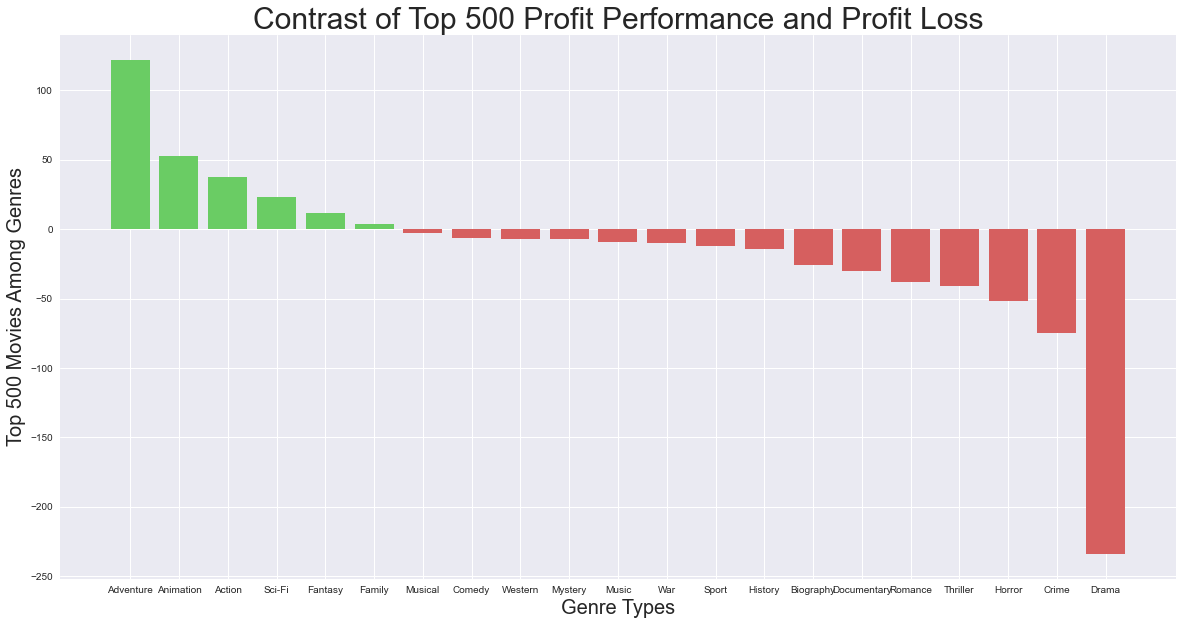

In [80]:
df = genre_comparison_df_dif

fig, ax = plt.subplots(figsize = (20,10))

ax.bar(x=df['index'], height=df['Difference'],  color=(df['Difference'] >= .50).map({True: 'g',
                                                    False: 'r'}))


ax.set_xlabel('Genre Types', size=20)
ax.set_ylabel('Top 500 Movies Among Genres', size=20)
ax.set_title('Contrast of Top 500 Profit Performance and Profit Loss', size=30);

This graph shows the difference between the number of times a genre appears in the top 500 most profitable movies and the number of times that genre does not generate a profit. Most of the genres are really close to the 0 line, but does show a few genres that perform very good or bad.

This graph takes into consderation how well a certain genre does in relation to how many movies of that genre are made. 

Only **6** genres show up in the Top 500 movies more often than they lose money. 
**Adventure** is far and a way the best performer by this metric. **Animation , Action, and Sci-Fi** are also perferable genres. **Fantasy and Family** have a slight positive schew as well.

**All other genres** are more likely to lose money than they are to be one of the top 500 movies. Most notably, **Drama** has a very negative schew. 

While I am advocating for Microsoft to pursue movies with a **high ceiling (maximum profit)**, it is important to recognize which movies also have a **high floor (lowest chance of losing money)**

In [81]:
genre_success_df = genre_comparison_df
genre_success_df = genre_success_df.drop(genre_success_df[['Profit', 'Loss', 'Total', 'Difference']], axis=1)

genre_success_df_2 = genre_comparison_df_2
genre_success_df_2 = genre_success_df_2.drop(genre_success_df_2[['Profit', 'Loss', 'Total', 'Difference']], axis=1)


genre_success_combined = pd.merge(genre_success_df, genre_success_df_2, on='index', how='inner')
genre_success_combined = genre_success_combined.rename(columns={'success_rate': 'break_even_rate'})

## Genre Performance DataFrame

In [82]:
genre_performance_df = pd.merge(genre_success_combined, genre_df_merged, on= 'index', how='left')
genre_performance_df['total_in_top_500_profit'] = genre_performance_df['profit_genres']
genre_performance_df['total_in_top_500_roi'] = genre_performance_df['roi_genres']
genre_performance_df = genre_performance_df.drop(genre_performance_df[['profit_genres', 'roi_genres']], axis=1)

genre_performance_df.sort_values('total_in_top_500_roi', ascending=False)

,index,top_500_rate,break_even_rate,loss_rate,total_in_top_500_profit,total_in_top_500_roi
15,Drama,26.22%,57.14%,42.86%,129,202
6,Comedy,49.09%,70.27%,29.73%,162,153
4,Action,55.56%,68.13%,31.87%,190,105
1,Adventure,72.43%,79.56%,20.44%,197,101
8,Thriller,39.15%,61.28%,38.72%,74,81
14,Horror,30.00%,56.25%,43.75%,39,70
11,Romance,33.90%,64.38%,35.62%,40,64
7,Mystery,45.33%,68.70%,31.30%,34,52
2,Sci-Fi,59.83%,68.46%,31.54%,70,48
16,Crime,25.81%,56.11%,43.89%,40,42


In [83]:
#success rate of the top 500 most profitable movies from 2010-2019
genre_performance_success_1 = genre_performance_df.sort_values('top_500_rate', ascending=False)

#success rate of all profitable movies from 2010-2019
genre_performance_success_2 = genre_performance_df.sort_values('break_even_rate', ascending=False)

# number of movies in the top 500 most profitable movies from 2010-2019
genre_performance_500_profit = genre_performance_df.sort_values('total_in_top_500_profit', ascending=False)

# number of movies in the top 500 ROI from 2010-2019
genre_performance_500_roi = genre_performance_df.sort_values('total_in_top_500_roi', ascending=False)

#  percentage of movies that lost money
genre_performance_loss_rate = genre_performance_df.sort_values('loss_rate', ascending=True)

## Question 3:  How much should Microsoft budget for it's movies?

In [84]:
roi_budget_df = top_roi.sort_values('production_budget', ascending=True)
low_budget_roi = roi_budget_df[0:150] #the 150 lowest budget movies in the top 500 ROI

high_budget_roi = roi_budget_df.sort_values('production_budget', ascending=False)
high_budget_roi = high_budget_roi[0:150] #the 150 highest budget movies in the top 500 ROI

#These are the genres for the 150 highest budget movies out of the top 500 ROI
high_budget_genres = genre_df(high_budget_roi)
high_budget_genres = high_budget_genres.reset_index()
high_budget_genres = high_budget_genres.sort_values('total', ascending=False)
high_budget_genres = high_budget_genres.drop(high_budget_genres[['level_0', 'genre_1', 'genre_2',
                                                                'genre_3']], axis=1)
#These are the genres for the 150 lowest budget movies out of the top 500 ROI
low_budget_genres = genre_df(low_budget_roi)
low_budget_genres = low_budget_genres.reset_index()
low_budget_genres = low_budget_genres.drop(low_budget_genres[['level_0', 'genre_1', 'genre_2',
                                                                'genre_3']], axis=1)
low_budget_genres = low_budget_genres.sort_values('total', ascending=False)

genre_budget_rank_df = pd.merge(high_budget_genres, low_budget_genres, on= 'index', how='left')
genre_budget_rank_df['high_budget'] = genre_budget_rank_df['total_x']
genre_budget_rank_df['low_budget'] = genre_budget_rank_df['total_y']
genre_budget_rank_df = genre_budget_rank_df.drop(genre_budget_rank_df[['total_x', 'total_y',]], axis=1)




In [85]:
low_budget_roi.describe()

,release_year,production_budget,total_profit,ROI,averagerating,numvotes,runtime_minutes
count,150,150,150,150,125,124,123
mean,"2,014","3,141,978","38,343,690",16,7,"77,249",98
std,3,"2,195,965","49,014,887",36,1,"97,349",14
min,"2,010","15,000","100,592",3,3,7,59
25%,"2,012","1,000,000","8,786,882",4,6,"13,716",89
50%,"2,014","3,000,000","21,397,120",8,7,"43,194",96
75%,"2,016","5,000,000","41,374,672",15,7,"104,250",104
max,"2,018","8,000,000","273,964,806",416,8,"616,916",165


In [86]:
high_budget_roi.describe()

,release_year,production_budget,total_profit,ROI,averagerating,numvotes,runtime_minutes
count,150,150,150,150,129,125,130
mean,"2,014","123,334,800","560,213,478",5,7,"353,567",118
std,2,"63,836,304","320,242,962",2,1,"308,396",23
min,"2,010","45,000,000","129,278,214",3,3,59,64
25%,"2,012","68,250,000","302,873,060",3,6,"153,270",97
50%,"2,015","113,000,000","497,757,260",4,7,"256,176",114
75%,"2,017","165,000,000","736,938,466",6,8,"514,510",134
max,"2,018","330,600,000","1,748,134,200",15,9,"1,841,066",180


High Budget Genres:
- Based on the data from the 2010-2019 ROI dataframe, I would estimate a **110 - 170 million dollar budget**, with **profits in the 500 million to 750 million dollar range**. Expect a **ROI of 4 to 6**.

Low Budget Genres:
- Budgets of **3 to 5 million dollars** with expected **profits between 22 and 42 million dollars** with a **ROI of 8 to 15**.

# Recommendations

## Microsoft Should Focus on Big Budget Movies

**I recommend that Microsoft's primary focus be on High Budget Movies.**
- High Budget Movies have a budget of 115 Million on the low end, 165 Million on the high end, and can be up to 330 Million according to the data that I have.
- Microsoft has a lot of resources at it's disposal and can afford the necessary budgets to make these movies.
- There is a lot more **reliability** in high budget movies, so it is easier to forecast results and predict which **genres** have a high probability of success.

## Microsoft Should Focus on Genres that Perform Well

Here are the criteria that we're looking for:
- **High Break-Even Rate**: We want to at a minimum recoup the money spend on production. The higher the Break-Even percentage the better!
- **High Top 500 Rate**: This is the rate that movies with this genre appeared in the top quartile of performance in our dataset. (500 out of 2000). The higher the percentage, the higher the chance for major profits.


### Recommended Genres

In [87]:
genre_performance_df.loc[(genre_performance_df['index'] == 'Animation')]

,index,top_500_rate,break_even_rate,loss_rate,total_in_top_500_profit,total_in_top_500_roi
0,Animation,81.18%,85.45%,14.55%,69,36


**Animation**: Animated Films have highest break-even rate and top 500 rate of any other genre. 
- This means that not only did 85% of these films recoup their production costs, but 81% of them ended up in the top quartile of profit performance. 
- Animation is as safe of a bet as you can get.


In [88]:
genre_performance_df.loc[(genre_performance_df['index'] == 'Adventure')]

,index,top_500_rate,break_even_rate,loss_rate,total_in_top_500_profit,total_in_top_500_roi
1,Adventure,72.43%,79.56%,20.44%,197,101


**Adventure** films are a close second to Animation. They were second in both metrics and very close to Animation.

In [89]:
genre_performance_success_2.loc[3:4]

,index,top_500_rate,break_even_rate,loss_rate,total_in_top_500_profit,total_in_top_500_roi
3,Fantasy,57.69%,74.02%,25.98%,45,28
5,Family,53.45%,73.27%,26.73%,31,19
6,Comedy,49.09%,70.27%,29.73%,162,153
7,Mystery,45.33%,68.70%,31.30%,34,52
2,Sci-Fi,59.83%,68.46%,31.54%,70,48
4,Action,55.56%,68.13%,31.87%,190,105


**Fantasy, Family, Comedy, Mystery, Sci-Fi, and Action** all have high break-even rates (68% or better), and a decent chance of making it into the Top 500. While these genres are not as safe of a bet as Animation or Adventure, they should reliabily hit the two metrics that we care about.

## Microsoft Should Take Calculated Risks with Low Budget Movies

Low budget movies cost just a fraction of high budget movies with average production budgets of 1 to 5 million dollars. Therefore it is okay to take more risks with these films becuase there is less money to lose. However, Microsoft should still be smart and deliberate about which genres they pursue.

In [90]:
low_budget_genres.loc[10:13]

,index,total
10,Horror,39
3,Comedy,34
16,Thriller,31
12,Mystery,28
13,Romance,25


In [91]:
genre_performance_df.loc[(genre_performance_df['index'] == 'Horror')]

,index,top_500_rate,break_even_rate,loss_rate,total_in_top_500_profit,total_in_top_500_roi
14,Horror,30.00%,56.25%,43.75%,39,70


In [92]:
genre_performance_df.loc[(genre_performance_df['index'] == 'Thriller')]

,index,top_500_rate,break_even_rate,loss_rate,total_in_top_500_profit,total_in_top_500_roi
8,Thriller,39.15%,61.28%,38.72%,74,81


In [93]:
genre_performance_df.loc[(genre_performance_df['index'] == 'Romance')]

,index,top_500_rate,break_even_rate,loss_rate,total_in_top_500_profit,total_in_top_500_roi
11,Romance,33.90%,64.38%,35.62%,40,64


**Low Budget Genres:**
- **Comedy and Mystery** appeared on both the high budget and low budget lists. Microsoft can make low budget films in those genres with confidence.
- **Horror, Thriller, and Romance** films all have a better than 50% chance of breaking even, rank high in ROI potentional, and about a third of them could end up being one of the Top 500 profitable movies. 
- **Other Genres**. For low budget movies, but I would recommend focusing on the 5 mentioned above as they are their best chance of financial success.

## Microsoft Shouldn't Make Dramas

**Stay away from Drama**

While there is still a greater than 50% chance of making money, it is in the **bottom 5 genres in top 500 success rate** This is because many, many, Drama movies made each year, and when one is a hit, it is a big hit! BUT most Drama films aren't super profitable, and nearly half don't make any money. **As a new movie studio, I recommend that Microsoft not pursue Drama movies at this time.**

# Summary

I was tasked with researching movies to see what types of movies are currently being made and using that information to make recommendations to Microsoft as to what types of movies to make with their new production studio.

I used financial data from The Numbers and Genre data from IMDB for this research. By linking them together, I was able to see which Genres had performed well at the box office as well as the production budget, total profit, and ROI. I used this data to caluculate Success Rates for breaking even and/or performing in the top quartile. 

The metrics that I recommend that Microsoft seek to emulate are movies where historically there was a very high break even success rate and high chance of performing in the top quartile. Using these metrics, I determined that Microsoft should focus on high budget movies primarily in the genres of Animation and Adventure. I also determined that they could diversify by making  Low Budget movies to suppliment their primary focus on high budget movies. For low budget, I recommended that they explore other genres with a high chance of breaking even and good potentional for perfoming in the top quartile. Specifically, Comedy, Mystery, Horror, Thriller, and Romance. 